###  Clustering : Image Processing : Image Compression

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from skimage import io

In [ ]:
url = 'https://www.gstatic.com/webp/gallery/4.jpg'
img_original = io.imread(url)

plt.axis('off')
plt.imshow(img_original)
plt.title(' Original ')
plt.show()

In [ ]:
img_original.shape

(772, 1024, 3)

In [ ]:
# Preprocessing :

img = np.array(img_original, dtype = float) / 255

In [ ]:
# Converting 3D into 2D

In [ ]:
772  * 1024 ,   3

(790528, 3)

In [ ]:
image = img.reshape([790528, 3])
image

array([[0.08627451, 0.48235294, 0.75686275],
       [0.09411765, 0.49019608, 0.76470588],
       [0.09803922, 0.49411765, 0.76862745],
       ...,
       [0.80784314, 0.80784314, 0.60392157],
       [0.54901961, 0.52156863, 0.40784314],
       [0.06666667, 0.00784314, 0.        ]])

In [ ]:
image.shape

(790528, 3)

In [ ]:
# Apply KMeans Algorithm

In [ ]:
KM32 = KMeans( n_clusters= 32, random_state= 123 )
KM32.fit(image)

KMeans(n_clusters=32, random_state=123)

In [ ]:
KM64 = KMeans(n_clusters= 64, random_state= 123 )
KM64.fit(image)

KMeans(n_clusters=64, random_state=123)

In [ ]:
# 32 CLusters

In [ ]:
print(set(KM32.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [ ]:
KM32.cluster_centers_

array([[0.64422844, 0.88676798, 0.98702087],
       [0.18435473, 0.33110013, 0.4274189 ],
       [0.22812828, 0.60508773, 0.86020958],
       [0.33291777, 0.34643484, 0.13080182],
       [0.68468449, 0.64668326, 0.4080382 ],
       [0.88162854, 0.86527715, 0.81355123],
       [0.15264512, 0.51474856, 0.77132084],
       [0.04469107, 0.04650154, 0.04909141],
       [0.70224478, 0.68586165, 0.62205107],
       [0.4283888 , 0.5220688 , 0.57672932],
       [0.46265645, 0.68802581, 0.83708001],
       [0.74724916, 0.90787253, 0.98312071],
       [0.06765705, 0.18488683, 0.28310561],
       [0.45498268, 0.44736663, 0.23095988],
       [0.64928842, 0.75555125, 0.82565433],
       [0.4398812 , 0.78291623, 0.97433072],
       [0.34975802, 0.56929738, 0.72339909],
       [0.24532894, 0.25785742, 0.22494427],
       [0.52248243, 0.50926673, 0.45185698],
       [0.55628929, 0.53399437, 0.31734965],
       [0.41556708, 0.42716275, 0.39391217],
       [0.34807321, 0.72704517, 0.94893887],
       [0.

In [ ]:
image[KM32.labels_ == 1 ]

array([[0.15294118, 0.34117647, 0.52941176],
       [0.14117647, 0.41568627, 0.32156863],
       [0.29803922, 0.32156863, 0.41568627],
       ...,
       [0.2627451 , 0.36078431, 0.44705882],
       [0.23137255, 0.37254902, 0.43529412],
       [0.23529412, 0.39607843, 0.37254902]])

In [ ]:
# Create a zero array of size =  (790528, 3)

compressed_32 = np.zeros([790528, 3], dtype = float )

In [ ]:
compressed_32

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
compressed_32[KM32.labels_ == 0 ] =  np.array([0.64422844, 0.88676798, 0.98702087])

array([False, False, False, ..., False, False, False])

In [ ]:
for i in range(32) :       # i = 0,1,2,3, .. , 31
    compressed_32[KM32.labels_ == i  ] = KM32.cluster_centers_[i]

In [ ]:
compressed_32

array([[0.15264512, 0.51474856, 0.77132084],
       [0.15264512, 0.51474856, 0.77132084],
       [0.15264512, 0.51474856, 0.77132084],
       ...,
       [0.80223069, 0.7780193 , 0.70238232],
       [0.52248243, 0.50926673, 0.45185698],
       [0.04469107, 0.04650154, 0.04909141]])

In [ ]:
# Convert 2D to 3D.

comp_ar_32 = compressed_32.reshape([772  , 1024 ,   3])

In [ ]:
# Convert scaled pixels values into original values.

comp32 =  np.array(comp_ar_32 * 255 , dtype = np.uint8 )

In [ ]:
comp32.shape

(772, 1024, 3)

In [ ]:
plt.imsave( 'Original', img_original)

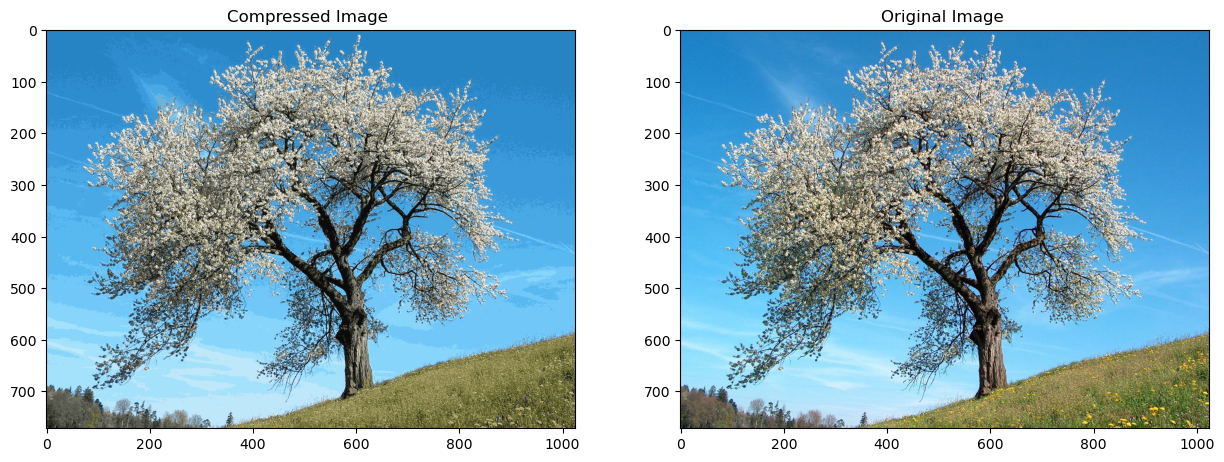

In [ ]:
plt.figure(figsize= [ 15, 10])

plt.subplot(1,2,1)
plt.title('Compressed Image ')
plt.imshow(comp32)

plt.subplot(1,2,2)
plt.title('Original Image ')
plt.imshow(img_original)
